# Introducción a regresión lineal 

1. Genera una linea de datos que mejor se ajusta a los datos originales.
2. Forma parte de análisis suverivsado.
3. Wo es el itercepto W1 es la pendiente
$$
   Y = w_{0} + w_{1}x
$$

### Las grandes preguntas
+ ¿Tengo que predecir una variable numerica? la respuesta debe ser afirmativa.
+ ¿Las variables independientes con las que cuento son primordialmente numericas? debe ser afirmativa
+ No cuento con una gran cantidad de variables categoricas? y/o variables categóricas con muchos niveles.
### Recomendaciones 
+ Si tiene que predecir variables númericas empieza con regresión lineal, si no funciona, salta a otros modelos.
+ Reduce las varianles lo mas que puedas.
+ Cuidado con la multicolinealidad. (variables muy relacionadas entre si)
+ No predecir fuera del dominio de la variable independiente.

Un algoritmo de ML siempre pasa por un loop:
1. Se ajusta el modelo.
2. Se compara resultados con los reales.
3. Se ajustan pesos en el modelo $W_{o}$ y $W_{1}$.
4. Regreso a paso inicial si no se converge.

+ Función de pérdida -> método de mínimos cuadrados
+ Algoritmo de optimización -> el más común es el de descenso del gradiente.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM','ZN','INDUS' , 'CHAS' ,'NOX','RM' ,'AGE','DIS', 'RAD','TAX', 'PTRATIO', 'B' , 'LSTAT' , 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos

    1. CRIM      per capita crime rate by town
    2. INDUS     proportion of non-retail business acres per town
    3. RM        average number of rooms per dwelling
    4. DIS       weighted distances to five Boston employment centres
    5. MEDV     Median value of owner-occupied homes in $1000's

In [22]:
sns.set(style='whitegrid', context='notebook', font_scale= 1.5)

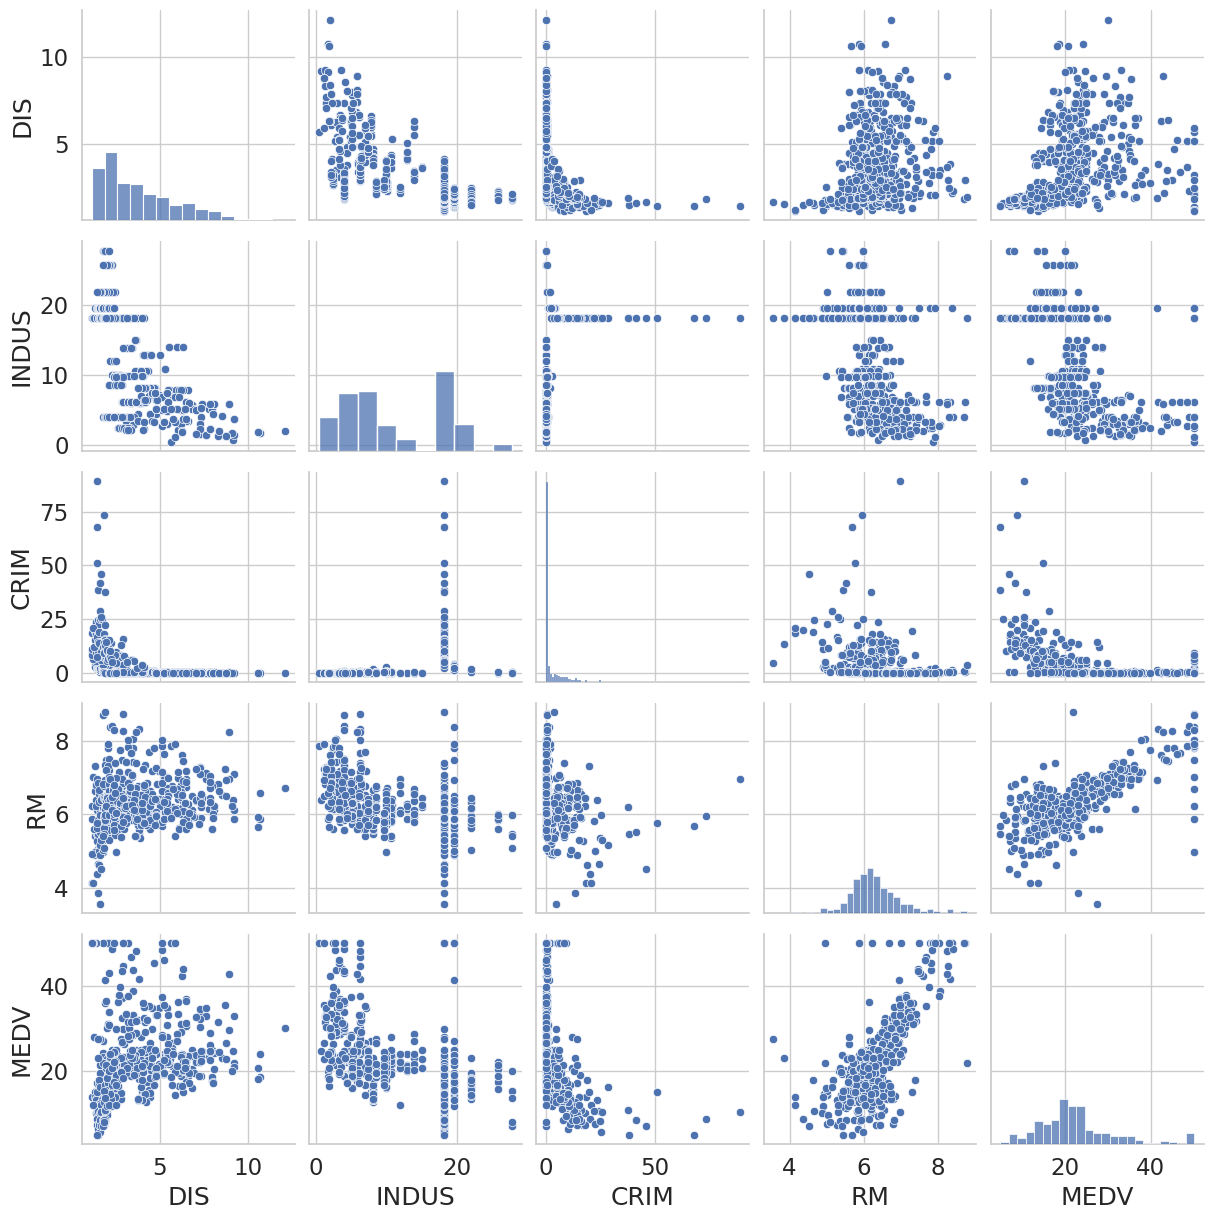

In [23]:
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<Axes: >

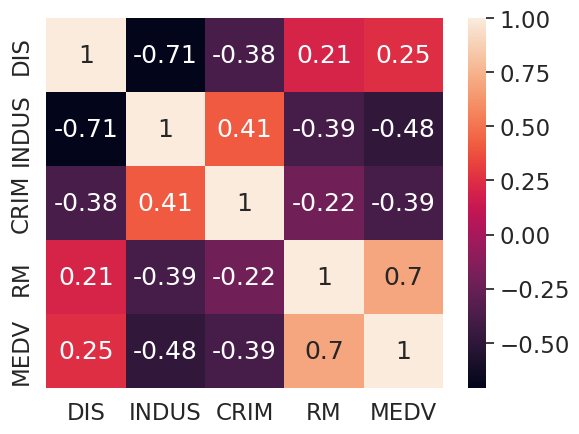

In [24]:
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(df[cols].corr(), cbar = True, annot=True, yticklabels=cols, xticklabels=cols)

## Creando modelo con scikit-learn

In [25]:
from sklearn.preprocessing import StandardScaler # escalamiento de los datos para que el modelo se ajueste mejor a ellos
from sklearn.linear_model import LinearRegression # modelo de regresion

In [26]:
# definir la variable a predecir sobre la variable que se va usar para ello
# reshape(-1, 1) -> vector filas a vector columnas
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1) 

# estandarizar los valores
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y) 

In [27]:
# Estranciar el modelo y aplicarlo a los datos
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Average of rooms (RM)')

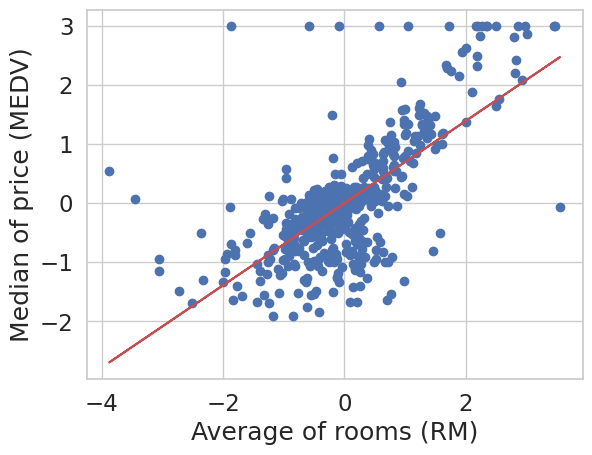

In [28]:
plt.scatter(X_std,y_std)
plt.plot(X_std, slr.predict(X_std), color='r')
plt.ylabel('Median of price (MEDV)')
plt.xlabel('Average of rooms (RM)')

## Generando predicción con el modelo

In [29]:
num_rooms = 5
num_rooms_std = sc_x.transform(np.array(num_rooms).reshape(-1, 1))
print('the price of a home in Boston is: ', sc_y.inverse_transform(slr.predict(num_rooms_std)))


the price of a home in Boston is:  [[10.83992413]]


**MSE (Mean Square Error)** se usa para evaluar función de pérdida. Comparar los valores predichos por el modelo con los datos. 

$$
 MSE = \frac{1}{N} \sum_{i=1}^N (y_i + \hat{y_i})^2
$$

**Coeficiente de determianción**: qur tan bien se ajusta el modelo a la varianza de los datos

$$
 R^2 = 1 - \frac{\sum_{i=1}^N (y_i + \hat{y_i})^2}{\sum_{i=1}^N (y_i + \hat{y})^2}
$$

# Regresion Lineal multiple

$$
 \hat{y} = w_o + w_1 * x_1 + ..... + w_n * x_n
$$

In [32]:
X = df[['RM', 'INDUS']].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1) 

# estandarizar los valores
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y) 

In [ ]:
from mpl_toolkits.mplot3d import *

In [ ]:
x1_range = np.arange(df['RM'].min(), df['RM'].max())
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())

x1, x2 = np.meshgrid(x1_range, x2_range)
plano = pd.DataFrame({'RM': x1.revel(), 'INDUS': x2.revel()})
pred = slr.predict(plano).reshape(x1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, pred, alpha=0.4)
ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color= 'R', marker='.')
ax.view_init(elev=10, azim=5)
plt.show()